# Case study: churn

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
% matplotlib inline

In [3]:
df = pd.read_csv('data/churn.csv')
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We see that the date is not in teh correct format. So we try to fix dates

In [11]:
start_date = pd.to_datetime('2014-07-01', format='%Y-%m-%d')
start_date = start_date - datetime.timedelta(30,0,0)
start_date

Timestamp('2014-06-01 00:00:00')

In [18]:
df.last_trip_date = pd.to_datetime(df.last_trip_date, format ='%Y-%m-%d')
df.signup_date = pd.to_datetime(df.signup_date, format ='%Y-%m-%d')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [47]:
cat = df.select_dtypes(exclude=np.number)
nums = df.select_dtypes(include=np.number)

In [48]:
nums.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00


In [35]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,0.092780
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,0.026791
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,0.011653
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,0.003333
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,-0.011797
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,-0.210463
luxury_car_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,-0.205002
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,-0.009693
churn,0.092780,0.026791,0.011653,0.003333,-0.011797,-0.210463,-0.205002,-0.009693,1.000000


In [49]:
cat.fillna('NaN',inplace=True);

/Users/amritahaldar/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# Now let's go over each value

### City

In [20]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

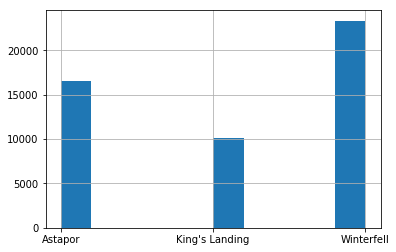

In [40]:
df.city.hist()

In [41]:
df.city.isnull().sum()

0

### Phone

In [21]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

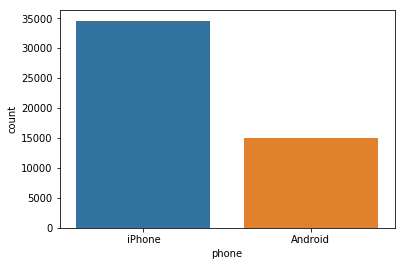

In [39]:
col = 'phone'
sns.countplot(x=col, data =df);

In [30]:
df.phone.isnull().sum()

396

We made the decision to fill 396 values as iphone

### surge_pct

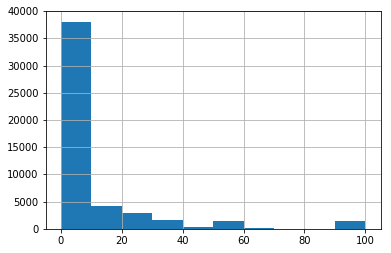

In [42]:
df['surge_pct'].hist()

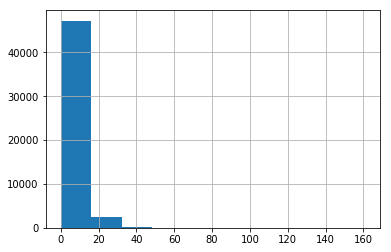

In [43]:
df['avg_dist'].hist()

In [54]:
cat.luxury_car_user.value_counts()

False    31146
True     18854
Name: luxury_car_user, dtype: int64

In [55]:
pd.crosstab(cat.phone,cat.city)

city,Astapor,King's Landing,Winterfell
phone,,,
Android,5244,2498,7280
NaN,121,64,211
iPhone,11169,7568,15845


In [56]:
pd.crosstab(cat.phone,cat.luxury_car_user)

luxury_car_user,False,True
phone,,
Android,10200,4822
NaN,154,242
iPhone,20792,13790


In [57]:
pd.crosstab(cat.phone,cat.luxury_car_user)

luxury_car_user,False,True
phone,,
Android,10200,4822
NaN,154,242
iPhone,20792,13790


### Create a target 'churn'

In [32]:
df['churn']=df.last_trip_date.apply(lambda x: x.month)<6

In [33]:
df['churn'].value_counts()

True     31196
False    18804
Name: churn, dtype: int64

### Trying some groupby

In [61]:
cat.columns

Index(['city', 'last_trip_date', 'phone', 'signup_date', 'luxury_car_user',
       'churn'],
      dtype='object')

In [65]:
for col in ['city', 'phone',  'luxury_car_user']:
    print(df.groupby(col).churn.mean())

city
Astapor           0.744285
King's Landing    0.371866
Winterfell        0.648055
Name: churn, dtype: float64
phone
Android    0.790574
iPhone     0.551067
Name: churn, dtype: float64
luxury_car_user
False    0.701182
True     0.496287
Name: churn, dtype: float64


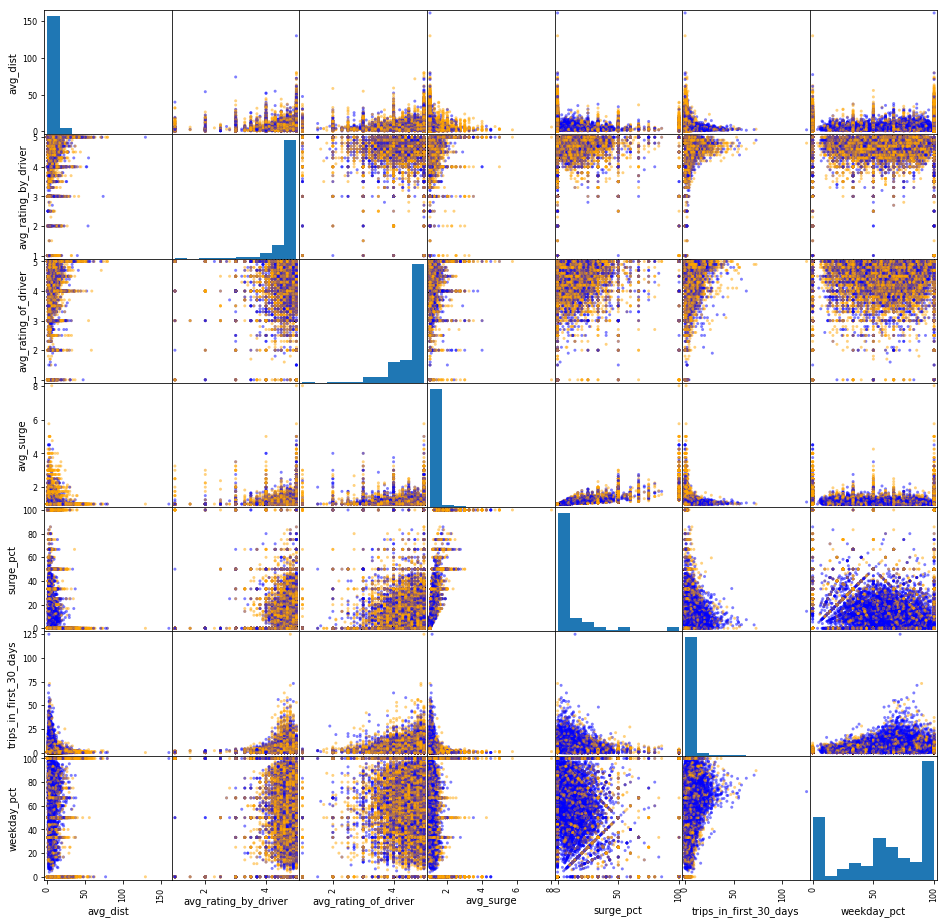

In [66]:
pd.plotting.scatter_matrix(df.drop(cat.columns, axis=1), figsize=(16, 16), 
                           c=df.churn.apply(lambda x: 'orange' if x else 'blue'));

The scatter matrix does not show any feature which will clearly separate out active vs. inactive users. Some features do seem to help. Thus, we probably have a highly non-linear relationship and should consider a **random forest** or **gradient boosted decision tree**, which are ensemble versions of a decision tree. 

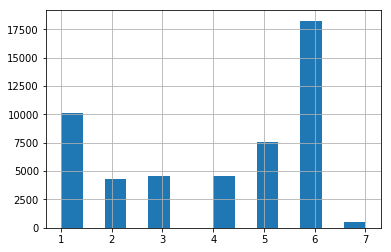

In [44]:
tmp2=df.last_trip_date.apply(lambda x: x.month)
tmp2.hist(bins=14);